In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [ ]:
pd.set_option('display.max_columns', None)
data = pd.read_csv("datasets/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data["Class"] = data["Class"].astype("category")

# Analyse Univariée du Dataset

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,1.673327e-15,-1.254995e-15,8.176030e-16,1.206296e-15,4.913003e-15,1.437666e-15,-3.800113e-16,9.572133e-16,1.039817e-15,6.406703e-16,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


## Equilibre des classes

0    284315
1       492
Name: Class, dtype: int64


<BarContainer object of 2 artists>

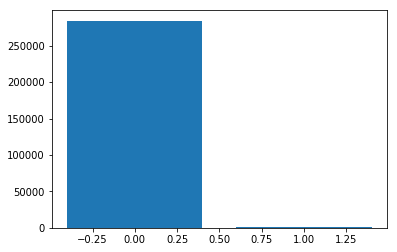

In [ ]:
counts = data["Class"].value_counts()
print(counts)
plt.bar(counts.index, counts)


Le dataset est très déséquilibré : 0.172% seulement sont des fraudes

## Distribution Time

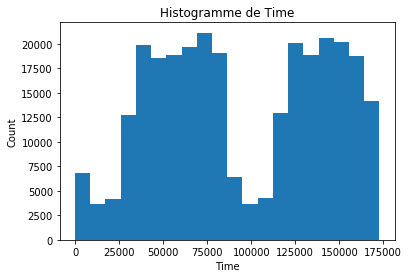

In [ ]:
plt.hist((data["Time"]), bins = 20)
plt.title("Histogramme de Time")
plt.xlabel("Time")
plt.ylabel("Count")
plt.show()

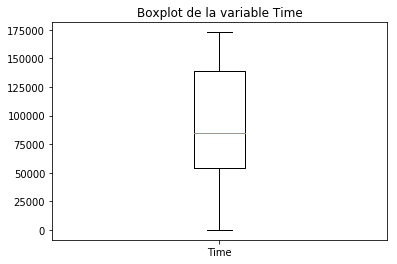

In [ ]:
plt.boxplot(data["Time"], labels = ["Time"])
plt.title("Boxplot de la variable Time")
plt.show()

## Distribution des montants

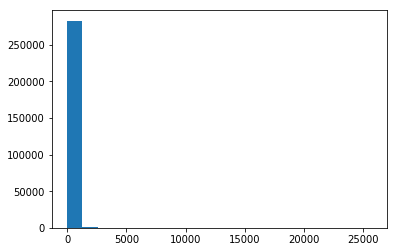

In [ ]:
plt.hist(data["Amount"], bins = 20)
plt.show()

### Log(1+montant)
Puisque la distribution précédente des Amounts est très asymétrique et a une allure exponentielle; nous traçons la distribution de log(1+Amount), ce qui permet d'obtenir la distribution ci-dessous beaucoup moins asymétrique et ressemblant à un mélange de lois normales.

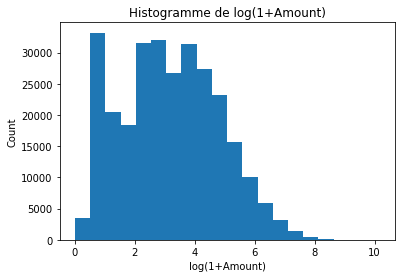

In [ ]:
plt.hist(np.log(1+data["Amount"]), bins = 20)
plt.title("Histogramme de log(1+Amount)")
plt.xlabel("log(1+Amount)")
plt.ylabel("Count")
plt.show()

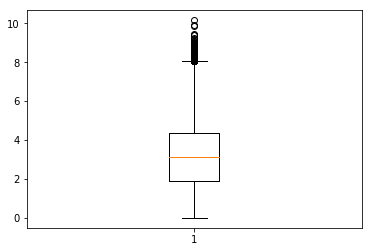

In [ ]:
plt.boxplot(np.log(1+data["Amount"]))
plt.show()

## Matrice des Corrélations

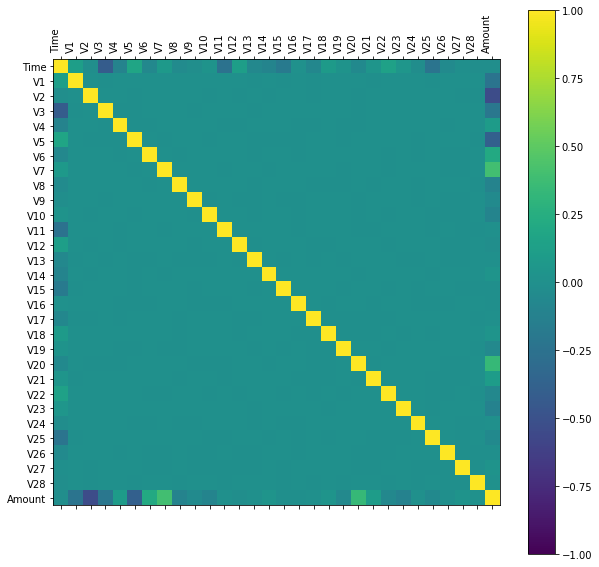

In [ ]:
tmp_dataX = data.drop(columns=["Class"])
fig, ax = plt.subplots(figsize=(10,10))
cax = ax.matshow(tmp_dataX.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ax.set_xticks([x for x in range(len(tmp_dataX.columns))])
ax.set_xticklabels(tmp_dataX.columns, rotation=90, horizontalalignment='right')

ax.set_yticks([x for x in range(len(tmp_dataX.columns))])
ax.set_yticklabels(tmp_dataX.columns)

plt.show()
del tmp_dataX

# Analyse Bivariée du Dataset
## Distribution des montants selon le temps

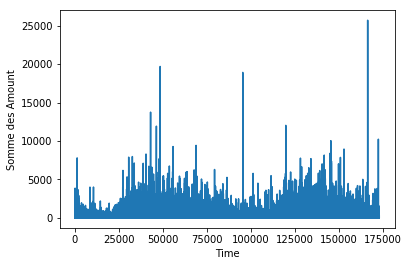

In [ ]:
plt.plot(data["Time"].unique(), data.groupby("Time").sum()["Amount"])
plt.xlabel("Time")
plt.ylabel("Somme des Amount")
plt.show()

## Scatter Plots (2 vars d'ACP)

### V1 et V2

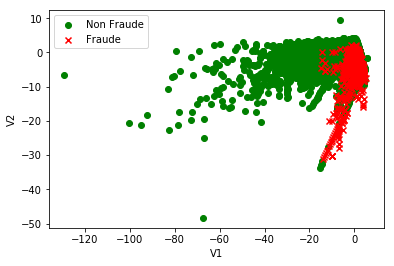

In [ ]:
scat = plt.scatter(data[data["Class"] == 0]["V1"]+data[data["Class"] == 0]["V2"], data[data["Class"] == 0]["V3"], c="green", marker="o", label = "Non Fraude")
scat = plt.scatter(data[data["Class"] == 1]["V1"]+data[data["Class"] == 1]["V2"], data[data["Class"] == 1]["V3"], c="red", marker="x", label = "Fraude")
plt.xlabel("V1")
plt.ylabel("V2")
plt.legend()
plt.show()

### V1 et V3

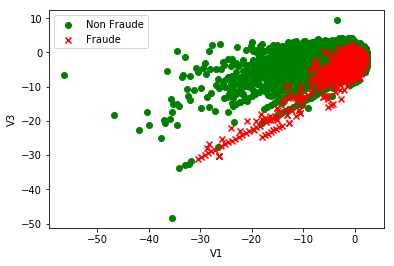

In [ ]:
scat = plt.scatter(data[data["Class"] == 0]["V1"], data[data["Class"] == 0]["V3"], c="green", marker="o", label = "Non Fraude")
scat = plt.scatter(data[data["Class"] == 1]["V1"], data[data["Class"] == 1]["V3"], c="red", marker="x", label = "Fraude")
plt.xlabel("V1")
plt.ylabel("V3")
plt.legend()
plt.show()

### Time et Amount

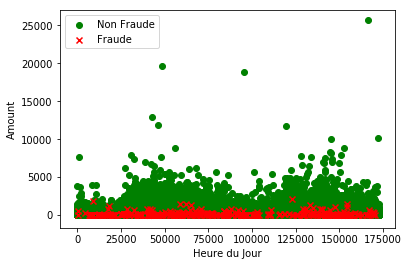

In [ ]:
scat = plt.scatter(data[data["Class"] == 0]["Time"], data[data["Class"] == 0]["Amount"], c="green", marker="o", label = "Non Fraude")
scat = plt.scatter(data[data["Class"] == 1]["Time"], data[data["Class"] == 1]["Amount"], c="red", marker="x", label = "Fraude")
plt.xlabel("Heure du Jour")
plt.ylabel("Amount")
plt.legend()
plt.show()

## Analyse par classe

In [ ]:
frauds = data[data["Class"]==1]
notfrauds = data[data["Class"]==0]

### Time

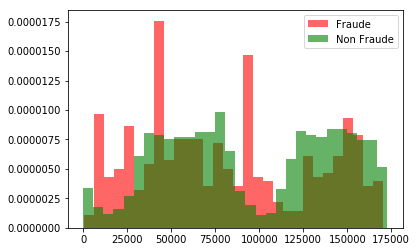

In [ ]:
plt.hist(frauds["Time"], bins=30, density=True, alpha=0.6, color="red", label="Fraude");
plt.hist(notfrauds["Time"], bins=30, density=True, color="green", alpha = 0.6, label="Non Fraude");
plt.legend()
plt.show()

In [ ]:
intervals = []
previous_t = -1
for i, t in enumerate(frauds["Time"]):
    if i==0:
        continue
    intervals.append(t-previous_t)
    previous_t = t

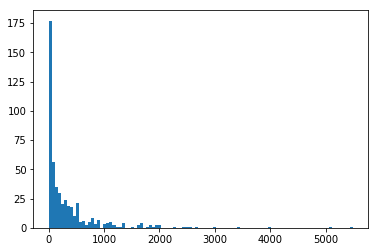

In [ ]:
plt.hist(intervals, bins=100);

In [ ]:
print("Nombre de fraudes par heure : %.2f" % (len(frauds)/data["Time"].iloc[-1]*3600))

Nombre de fraudes par heure : 10.25


### Amount

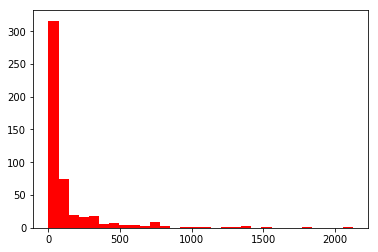

In [ ]:
plt.hist(frauds["Amount"], bins=30, color="red");

In [ ]:
frauds["Amount"].value_counts()

1.00      113
0.00       27
99.99      27
0.76       17
0.77       10
         ... 
323.77      1
57.73       1
3.93        1
2.47        1
175.90      1
Name: Amount, Length: 259, dtype: int64

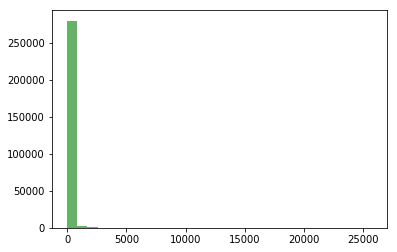

In [ ]:
plt.hist(notfrauds["Amount"], bins=30,color="green", alpha = 0.6);


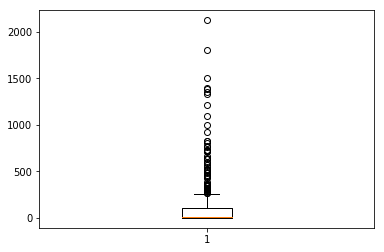

In [ ]:
plt.boxplot(frauds["Amount"])
plt.show()

On remarque que les fraudes se font généralement par petites sommes

### V1

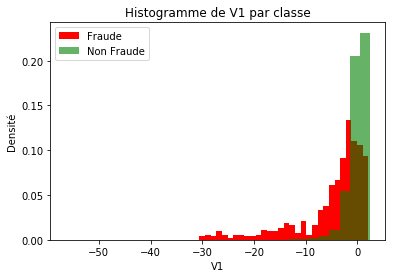

In [ ]:
plt.hist(frauds["V1"], bins=30, density=True, color="red", label = "Fraude");
plt.hist(notfrauds["V1"], bins=30, density=True, alpha = 0.6, color="green", label = "Non Fraude");
plt.xlabel("V1")
plt.ylabel("Densité")
plt.legend()
plt.title("Histogramme de V1 par classe")
plt.show()

On remarque que les fraudes ont tendance à avoir des valeurs plus petites de V1

### V2

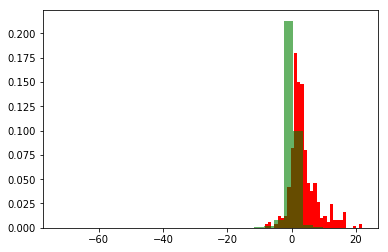

In [ ]:
plt.hist(frauds["V2"], bins=30, density=True, color="red");
plt.hist(notfrauds["V2"], bins=30, density=True, alpha = 0.6, color="green");
plt.show()

Les fraudes ont tendance à avoir des valeurs plus grandes de V2

### V3

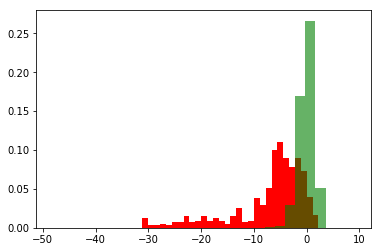

In [ ]:
plt.hist(frauds["V3"], bins=30, density=True, color="red");
plt.hist(notfrauds["V3"], bins=30, density=True, alpha = 0.6, color="green");
plt.show()

Les fraudes ont tendance à avoir des valeurs plus petites de V3

# Adaptation de la variable Time (=> heure du jour)
**IL NE FAUT EXECUTER LES 9 CELLULES SUIVANTES QUE POUR PRETRAITEMENT 3**

In [ ]:
counts = pd.cut(data["Time"], bins=48).value_counts()
vals_disc = pd.cut(data["Time"], bins=48)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
vals_disc = le.fit_transform(vals_disc)

<BarContainer object of 48 artists>

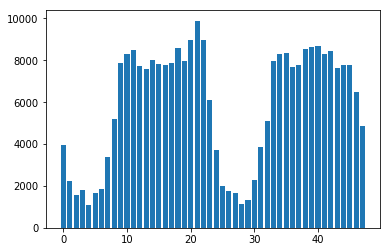

In [ ]:
plt.bar(pd.Series(vals_disc).value_counts().index, pd.Series(vals_disc).value_counts())

In [ ]:
vals_disc

array([ 0,  0,  0, ..., 47, 47, 47])

In [ ]:
dt_vals_disc = pd.Series(vals_disc) 
dt_vals_disc = dt_vals_disc%24

Text(0.5, 1.0, 'Distribution des transactions par heure du jour')

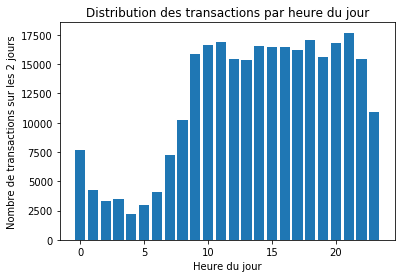

In [ ]:
plt.bar(dt_vals_disc.value_counts().index, dt_vals_disc.value_counts())
plt.xlabel("Heure du jour")
plt.ylabel("Nombre de transactions sur les 2 jours")
plt.title("Distribution des transactions par heure du jour")

In [ ]:
data["Time"] = dt_vals_disc

In [ ]:
frauds = data[data["Class"]==1]
notfrauds = data[data["Class"]==0]

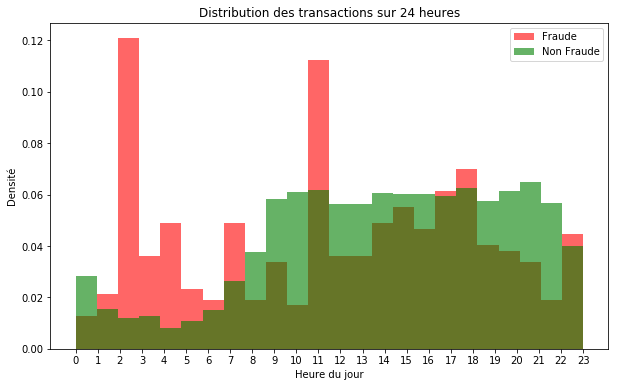

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(frauds["Time"], bins=24, density=True, alpha=0.6, color="red", label="Fraude");
plt.hist(notfrauds["Time"], bins=24, density=True, color="green", alpha = 0.6, label="Non Fraude");
plt.title("Distribution des transactions sur 24 heures")
plt.xticks(np.arange(0, 24, 1.0))
plt.xlabel("Heure du jour")
plt.ylabel("Densité")
plt.legend()
plt.show()

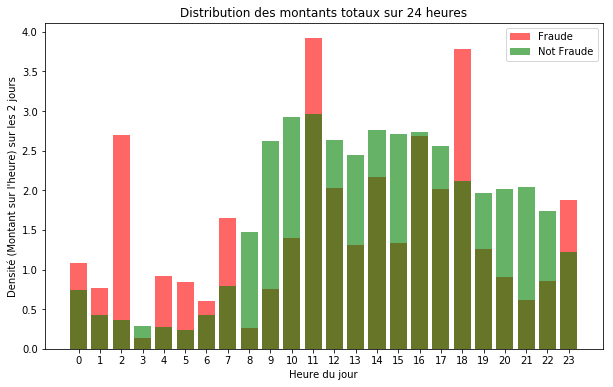

In [ ]:
amounts_per_hour_fraud = frauds.groupby("Time").sum()["Amount"]/2 # moyenne sur 2 jours
amounts_per_hour_notfraud = notfrauds.groupby("Time").sum()["Amount"]/2 # moyenne sur 2 jours

plt.figure(figsize=(10,6))
plt.bar(amounts_per_hour_fraud.index, (amounts_per_hour_fraud)/amounts_per_hour_fraud.std(), alpha=0.6, color="red", label="Fraude");
plt.bar(amounts_per_hour_notfraud.index, (amounts_per_hour_notfraud)/amounts_per_hour_notfraud.std(), alpha=0.6, color="green", label="Not Fraude");
plt.title("Distribution des montants totaux sur 24 heures")
plt.xticks(np.arange(0, 24, 1.0))
plt.xlabel("Heure du jour")
plt.ylabel("Densité (Montant sur l'heure) sur les 2 jours")
plt.legend()
plt.show()

# Normalisation robuste

In [ ]:
from sklearn.preprocessing import RobustScaler
# src : https://www.kaggle.com/chanakyavivekkapoor/credit-card-fraud-detection-handling-imbalance
rs = RobustScaler()

data['scaled_amount'] = rs.fit_transform(data['Amount'].values.reshape(-1, 1))
data['scaled_time'] = rs.fit_transform(data['Time'].values.reshape(-1, 1))

data.drop(['Amount', 'Time'], axis = 1, inplace = True)

# Splitting Train/Test

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

import warnings
warnings.filterwarnings('ignore')

In [ ]:
Y = data["Class"]
X = data.drop(columns=["Class"])
validation_size = 0.3
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

## Prétraitements 2/3 : Avec rééquilibrage

In [ ]:
# Ne pas exécuter pour tester avec le dataset déséquilibré (Prétraitement 1)
s = SMOTE()
X_train_smote, Y_train_smote = s.fit_sample(X_train, Y_train)

In [ ]:
'''
fig, ax = plt.subplots(figsize=(20, 10))

pred_prob = rf.predict_proba(X_validation)
pred = rf.predict(X_validation)
accuracy = (pred == Y_validation).sum()/len(X_validation) * 100
fscore = f1_score(Y_validation, pred)
precision, recall, thresholds = precision_recall_curve(Y_validation, pred_prob[:,1])

print("| {} | {:.2f} | {:.4F} | {:.4f} |".format("RF", accuracy, fscore, auc(recall, precision)))
ax.plot(recall, precision, label="RF")
plt.xlabel("Recall")
plt.ylabel("Precision")
for i,xety in enumerate(list(zip(recall, precision))):
    if i%3 !=0:
        continue
    if i < len(thresholds):
        plt.annotate(thresholds[i], xy= xety)

plt.plot([0,1], [1, 0], color="black")
plt.legend()
''';

In [ ]:
'''
threshold = 0.4
pred = (pred_prob[:,1] >= threshold).astype('int')

print(classification_report(Y_validation, pred, target_names=["Not Fraud", "Fraud"]))
cm = confusion_matrix(Y_validation, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Fraud", "Fraud"])
disp.plot() 
''';

In [ ]:
import time
num_folds = 10
seed = 7
scoring = 'f1_macro' 
models = []
models.append(('LR', LogisticRegression(n_jobs=7)))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_jobs=7)))
models.append(('NB', GaussianNB()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    print("Execution de {}".format(name))
    start = time.time()
    %time cv_results = cross_val_score(model, X_train_smote, Y_train_smote, cv=kfold, scoring=scoring)
    t = time.time() - start
    results.append(cv_results)
    names.append(name)
    msg = "\t %s: %f (%f)  en  (%f secondes)" % (name, cv_results.mean(), cv_results.std(), t)
    print(msg)
    print("-------------------------")
    print()

In [ ]:
for name, model in models:
    start = time.time()
    model.fit(X_train_smote, Y_train_smote)
    print("Le Training de {} a pris {} secondes".format(name, time.time()-start))

Le Training de LR a pris 43.57508134841919 secondes
Le Training de QDA a pris 1.162933111190796 secondes
Le Training de CART a pris 40.74805688858032 secondes
Le Training de RF a pris 85.66559934616089 secondes
Le Training de NB a pris 0.4318873882293701 secondes


| LR | 97.32 | 0.5484 | 0.8253 |
              precision    recall  f1-score   support

   Not Fraud     0.9998    0.9733    0.9864     85288
       Fraud     0.0588    0.9161    0.1105       155

    accuracy                         0.9732     85443
   macro avg     0.5293    0.9447    0.5484     85443
weighted avg     0.9981    0.9732    0.9848     85443



| QDA | 97.41 | 0.5511 | 0.5475 |
              precision    recall  f1-score   support

   Not Fraud     0.9999    0.9742    0.9869     85288
       Fraud     0.0615    0.9290    0.1153       155

    accuracy                         0.9741     85443
   macro avg     0.5307    0.9516    0.5511     85443
weighted avg     0.9982    0.9741    0.9853     85443



| CART | 99.72 | 0.7550 | 0.5856 |
              precision    recall  f1-score   support

   Not Fraud     0.9996    0.9976    0.9986     85288
       Fraud     0.3773    0.7935    0.5114       155

    accuracy                         0.9972     85443
   macro avg     0.688

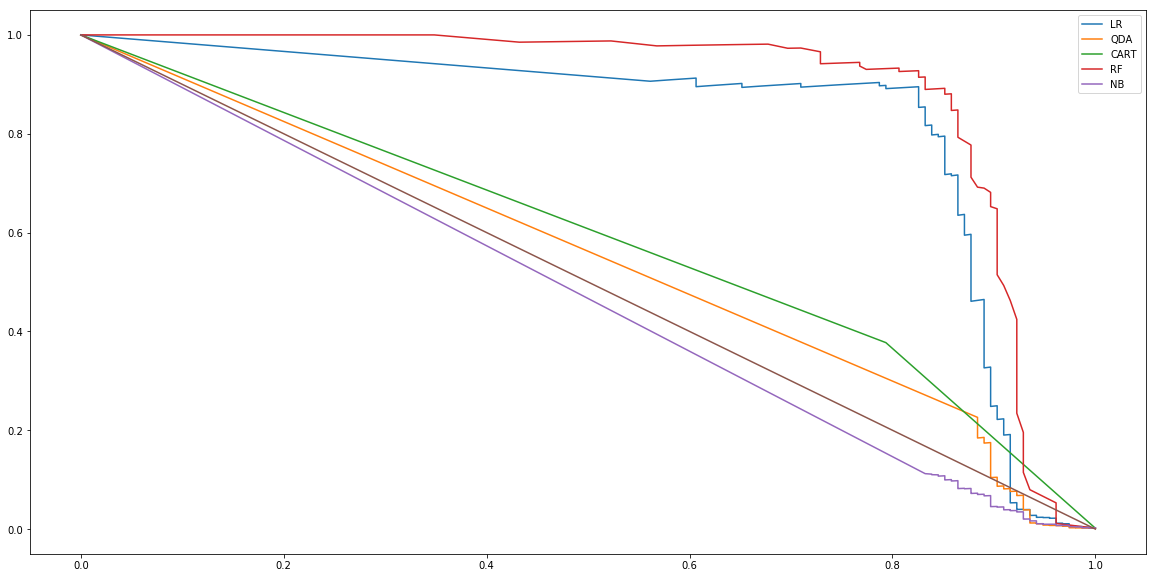

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
i=0
for name, model in models:
    pred_prob = model.predict_proba(X_validation)
    pred = model.predict(X_validation)
    accuracy = (pred == Y_validation).sum()/len(X_validation) * 100
    fscore = f1_score(Y_validation, pred, average='macro')
    precision, recall, thresholds = precision_recall_curve(Y_validation, pred_prob[:,1])
    print("| {} | {:.2f} | {:.4F} | {:.4f} |".format(name, accuracy, fscore, auc(recall, precision)))
    print(classification_report(Y_validation, pred, target_names=["Not Fraud", "Fraud"], digits=4))
    print()
    print()
    ax.plot(recall, precision, label=name)

    i+=1
plt.plot([0,1], [1, 0])
plt.legend()

## Prétraitement 1 : Sans rééquilibrage

In [ ]:
validation_size = 0.3
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [ ]:
import time
num_folds = 10
seed = 7
scoring = 'f1'
models = []
models.append(('LR', LogisticRegression(n_jobs=7)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_jobs=7)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_jobs=7)))
models.append(('NB', GaussianNB()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    print("Execution de {}".format(name))
    start = time.time()
    %time cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    t = time.time() - start
    results.append(cv_results)
    names.append(name)
    msg = "\t %s: %f (%f)  en  (%f secondes)" % (name, cv_results.mean(), cv_results.std(), t)
    print(msg)
    print("-------------------------")
    print()

In [ ]:
for name, model in models:
    start = time.time()
    model.fit(X_train, Y_train)
    print("Le Training de {} a pris {} secondes".format(name, time.time()-start))

Le Training de LR a pris 22.56732964515686 secondes
Le Training de LDA a pris 1.2922227382659912 secondes
Le Training de QDA a pris 0.6054153442382812 secondes
Le Training de KNN a pris 0.028461933135986328 secondes
Le Training de CART a pris 18.346893548965454 secondes
Le Training de RF a pris 47.48606824874878 secondes
Le Training de NB a pris 0.18949532508850098 secondes


| LR | 99.91 | 0.8550 | 0.7922 |
              precision    recall  f1-score   support

   Not Fraud     0.9993    0.9999    0.9996     85288
       Fraud     0.8846    0.5935    0.7104       155

    accuracy                         0.9991     85443
   macro avg     0.9419    0.7967    0.8550     85443
weighted avg     0.9991    0.9991    0.9990     85443



| LDA | 99.95 | 0.9309 | 0.8402 |
              precision    recall  f1-score   support

   Not Fraud     0.9997    0.9998    0.9998     85288
       Fraud     0.9014    0.8258    0.8620       155

    accuracy                         0.9995     85443
   macro avg     0.9505    0.9128    0.9309     85443
weighted avg     0.9995    0.9995    0.9995     85443



| QDA | 97.63 | 0.5551 | 0.5281 |
              precision    recall  f1-score   support

   Not Fraud     0.9998    0.9764    0.9880     85288
       Fraud     0.0655    0.9097    0.1222       155

    accuracy                         0.9763     85443
   macro avg     0.5327

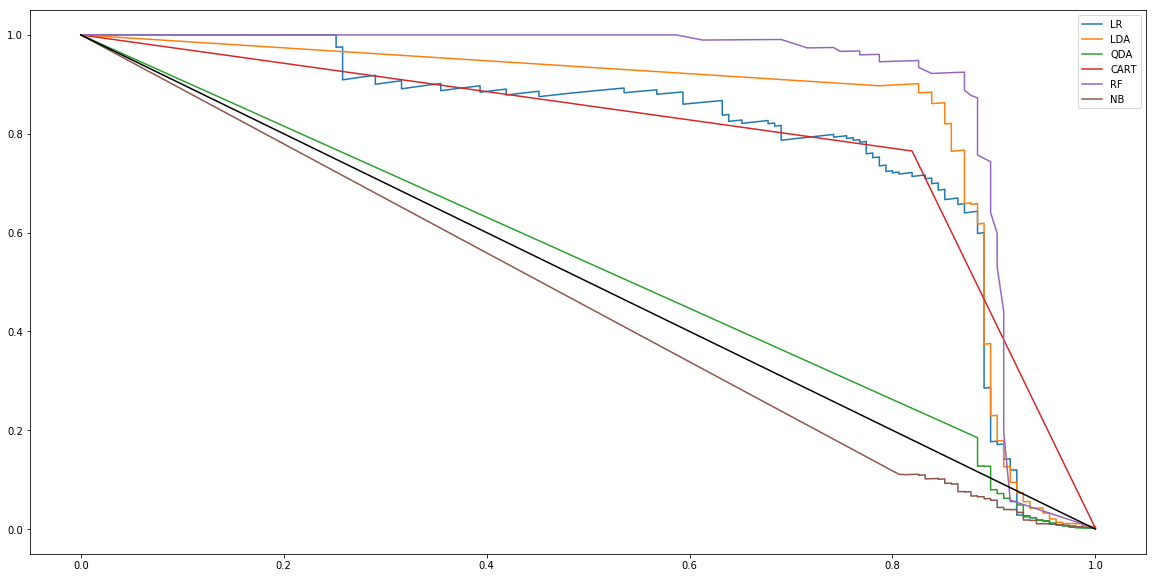

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
i=0
for name, model in models:
    if name == "KNN":
        continue
    pred_prob = model.predict_proba(X_validation)
    pred = model.predict(X_validation)
    accuracy = (pred == Y_validation).sum()/len(X_validation) * 100
    fscore = f1_score(Y_validation, pred, average='macro')
    precision, recall, thresholds = precision_recall_curve(Y_validation, pred_prob[:,1])

    print("| {} | {:.2f} | {:.4F} | {:.4f} |".format(name, accuracy, fscore, auc(recall, precision)))
    print(classification_report(Y_validation, pred, target_names=["Not Fraud", "Fraud"], digits=4))
    print()
    print()
    ax.plot(recall, precision, label=name)

    i+=1
plt.plot([0,1], [1, 0], "black")
plt.legend()

# Imbalanced Data Methods

In [ ]:
Y = data["Class"]
X = data.drop(columns=["Class"])
validation_size = 0.3
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

| ISO-F | 96.61 | 0.3279 | 0.4625 |


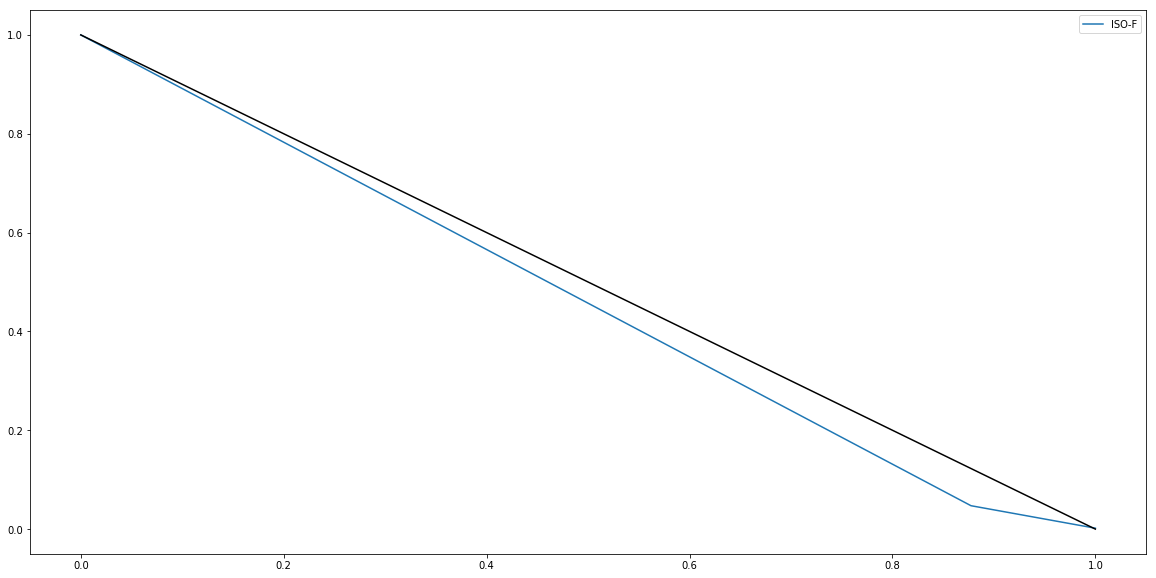

In [ ]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest().fit(X_train)
fig, ax = plt.subplots(figsize=(20, 10))

pred = 1 - clf.predict(X_validation)
accuracy = (pred == Y_validation).sum()/len(X_validation) * 100
fscore = f1_score(Y_validation, pred, average="macro")
precision, recall, thresholds = precision_recall_curve(Y_validation, pred)

print("| {} | {:.2f} | {:.4F} | {:.4f} |".format("ISO-F", accuracy, fscore, auc(recall, precision)))
ax.plot(recall, precision, label="ISO-F")


plt.plot([0,1], [1, 0], color="black")
plt.legend()

In [ ]:
pred = (1-pd.Series(pred).replace(2,0)).to_numpy()

In [ ]:
print(classification_report(Y_validation, pred, target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       0.00      0.00      0.00     85288
       Fraud       0.00      1.00      0.00       155

    accuracy                           0.00     85443
   macro avg       0.00      0.50      0.00     85443
weighted avg       0.00      0.00      0.00     85443



# Méthode sensible aux coûts

In [ ]:
def sigmoid(x, deriv=False):
    ret = 1 / (1 + np.exp(-x))
    ret = min(ret, 0.9999) # quand x est trop grand, l'output peut devenir = 1 => log(0)=NAN => ERREUR
    ret = max(ret, 0.0001)
    if deriv:
        return ret * (1-ret)
    return ret
def f(X,W):
    return sigmoid(W.T.dot(X))

def Ji(X, Y, W, lam, seuil):
    ff = f(X,W)
    return -Y*np.log(ff) - (1-Y)*np.log(1-ff) + lam * Y * max(seuil - ff, 0) * X[-2]

def JALL(X_ALL, Y_ALL, lam, seuil):
    Jcalc = 0
    for i in range(len(X_ALL)):
        Jcalc += Ji(X_ALL[i,:], Y_ALL[i], W, lam, seuil)/len(X_ALL)
    return Jcalc

def Ji_deriv(X, Y, W, lam, seuil, j):
    ff = f(X, W)
    ret = X[j] * (ff - Y)
    if ff < seuil: # si classifiée comme fraude
        return ret - lam * Y * X[j] * ff * (1 - ff) * X[-2]
    return ret # sinon

In [ ]:
X_train_smote.to_numpy()[-1,:]

In [ ]:
X_train_smote_np = np.c_[np.ones(len(X_train_smote)), X_train_smote.to_numpy()]
Y_train_smote_np = Y_train_smote.to_numpy()

In [ ]:
X_train_smote_np.shape

In [ ]:
X_train_smote.shape

In [ ]:
jws = []
NB_IT = 20
lam = 0.5
seuil = 0.5
lr = 0.01
W = np.random.random(X_train_smote_np.shape[1])
J = JALL(X_train_smote_np, Y_train_smote_np, lam, seuil)
print("Erreur initiale : {}".format(J))
for it in range(NB_IT):
    for i in range(len(X_train_smote_np)):
        for j in range(X_train_smote_np.shape[1]):
            W[j] = W[j] - lr * Ji_deriv(X_train_smote_np[i,:], Y_train_smote_np[i], W, lam, seuil, j)
    J_prev = J
    J = JALL(X_train_smote_np, Y_train_smote_np, lam, seuil)
    if J >= J_prev :
        lr *= 0.9
    jws.append(J)
    print("Itération {} : {}".format(it, J))
    

In [ ]:
NB_IT = 20
lam = 0.05
seuil = 0.5
lr = 0.1
J = JALL(X_train_smote_np, Y_train_smote_np, lam, seuil)
print("Erreur initiale : {}".format(J))
for it in range(NB_IT):
    for i in range(len(X_train_smote_np)):
        for j in range(X_train_smote_np.shape[1]):
            W[j] = W[j] - lr * Ji_deriv(X_train_smote_np[i,:], Y_train_smote_np[i], W, lam, seuil, j)
    J_prev = J
    J = JALL(X_train_smote_np, Y_train_smote_np, lam, seuil)
    if J >= J_prev :
        old_lr = lr
        lr *= 0.9
        print("CHANGEMENT LR {} => {}".format(old_lr, lr))
    jws.append(J)
    print("Itération {} : {}".format(it, J))

In [ ]:
plt.plot(jws)

In [ ]:
X_validation_np = np.c_[np.ones(len(X_validation)), X_validation.to_numpy()]

In [ ]:
pred = np.array([1 if f(x, W)>0.9998 else 0 for x in X_validation_np])

In [ ]:
(pred == Y_validation).mean()

In [ ]:
print(classification_report(Y_validation, pred))

In [ ]:
X_validation[(pred!=Y_validation) & (Y_validation==1)]

In [ ]:
X_validation[(pred==Y_validation) & (Y_validation==1)]